In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)


In [409]:
df1 = pd.read_csv("zameen-updated.csv")
df1.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [410]:
df1.shape

(168446, 20)

In [411]:
df1.groupby('location')['location'].agg('count').sort_values(ascending=False)

location
DHA Defence                   22046
Bahria Town Karachi            8548
Bahria Town Rawalpindi         8502
Bahria Town                    6429
Gulistan-e-Jauhar              5877
                              ...  
Saadi Park                        1
Saadat Avenue                     1
Ryaz ul Jannah                    1
Gulshan-E-Faisal                  1
Green Hills Housing Scheme        1
Name: location, Length: 1509, dtype: int64

In [412]:
df1.groupby('Area Type')['Area Type'].agg('count').sort_values(ascending=False)

Area Type
Marla    137769
Kanal     30677
Name: Area Type, dtype: int64

In [413]:
df1.columns


Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Area Type', 'Area Size', 'Area Category'],
      dtype='object')

In [414]:
df2 = df1.drop(['property_id', 'location_id', 'page_url',
       'location',  'province_name', 'latitude', 'longitude',
       'area', 'purpose',  'date_added', 'agency', 'agent',
       'Area Category'], axis='columns')
df2.head()

,property_type,price,city,baths,bedrooms,Area Type,Area Size
0,Flat,10000000,Islamabad,2,2,Marla,4.0
1,Flat,6900000,Islamabad,3,3,Marla,5.6
2,House,16500000,Islamabad,6,5,Marla,8.0
3,House,43500000,Islamabad,4,4,Kanal,2.0
4,House,7000000,Islamabad,3,3,Marla,8.0


In [415]:
df2['property_type'].unique()
df2['city'].isnull().sum()
location_stats = df2.groupby('city')['city'].agg('count').sort_values(ascending=False)
location_stats
df2.shape

(168446, 7)

In [416]:
df2.to_csv('df2save.updated.csv', index=False)

In [417]:
# Function to remove outliers based on the IQR method
def remove_outliers(df2, column):
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]
    return df_out

# Remove outliers from the relevant columns
df_cleaned = df2.copy()
for column in ['price', 'baths', 'bedrooms', 'Area Size']:
    df_cleaned = remove_outliers(df_cleaned, column)



In [418]:
df3 = df_cleaned
df3.head()


,property_type,price,city,baths,bedrooms,Area Type,Area Size
0,Flat,10000000,Islamabad,2,2,Marla,4.0
1,Flat,6900000,Islamabad,3,3,Marla,5.6
2,House,16500000,Islamabad,6,5,Marla,8.0
3,House,43500000,Islamabad,4,4,Kanal,2.0
4,House,7000000,Islamabad,3,3,Marla,8.0


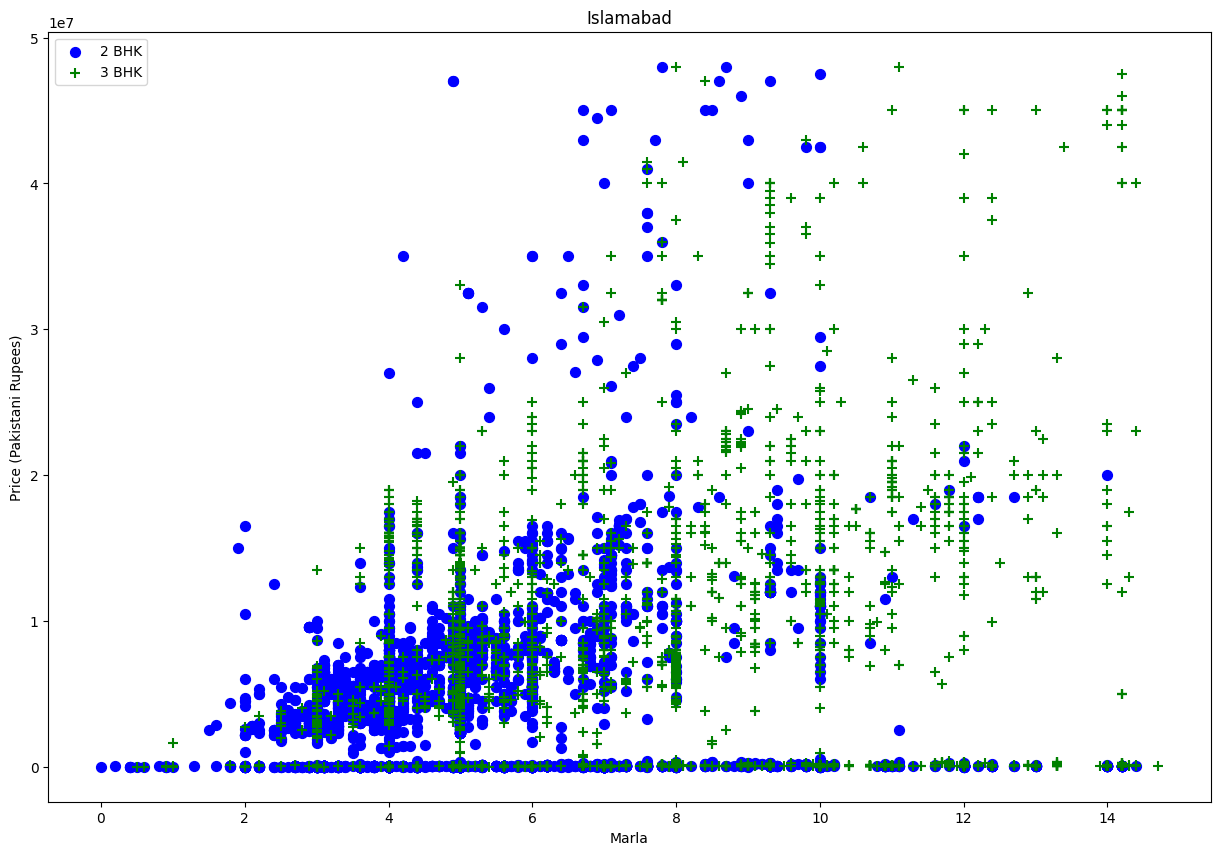

In [419]:

def plot_scatter_chart(df3, city):
    bhk2 = df3[(df3.city == city) & (df3['Area Type'] == 'Marla') & (df3.bedrooms == 2)]
    bhk3 = df3[(df3.city == city) & (df3['Area Type'] == 'Marla') & (df3.bedrooms == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2['Area Size'], bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3['Area Size'], bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Marla")
    plt.ylabel("Price (Pakistani Rupees)")
    plt.title(city)
    plt.legend()
    plt.show()

# Example usage:
plot_scatter_chart(df3, 'Islamabad')



In [420]:
# Separate the dataset by Area Type
marla_df = df3[df3['Area Type'] == 'Marla']
kanal_df = df3[df3['Area Type'] == 'Kanal']

marla_df.head()


,property_type,price,city,baths,bedrooms,Area Type,Area Size
0,Flat,10000000,Islamabad,2,2,Marla,4.0
1,Flat,6900000,Islamabad,3,3,Marla,5.6
2,House,16500000,Islamabad,6,5,Marla,8.0
4,House,7000000,Islamabad,3,3,Marla,8.0
7,Flat,7800000,Islamabad,2,2,Marla,6.2


In [421]:
# Function to remove outliers based on Area Size and Price relationship
def remove_outliers(df3):
    # Group by Area Size and Price to find duplicated prices for different sizes
    duplicated_prices = df3.groupby('price')['Area Size'].nunique()
    # Get prices with multiple area sizes
    outlier_prices = duplicated_prices[duplicated_prices > 1].index
    
    # Remove outliers
    cleaned_df = df3[~df3['price'].isin(outlier_prices)]
    
    return cleaned_df

# Remove outliers from both Marla and Kanal datasets
cleaned_marla_df = remove_outliers(marla_df)
cleaned_kanal_df = remove_outliers(kanal_df)

# Combine the cleaned datasets
df4 = pd.concat([cleaned_marla_df, cleaned_kanal_df])

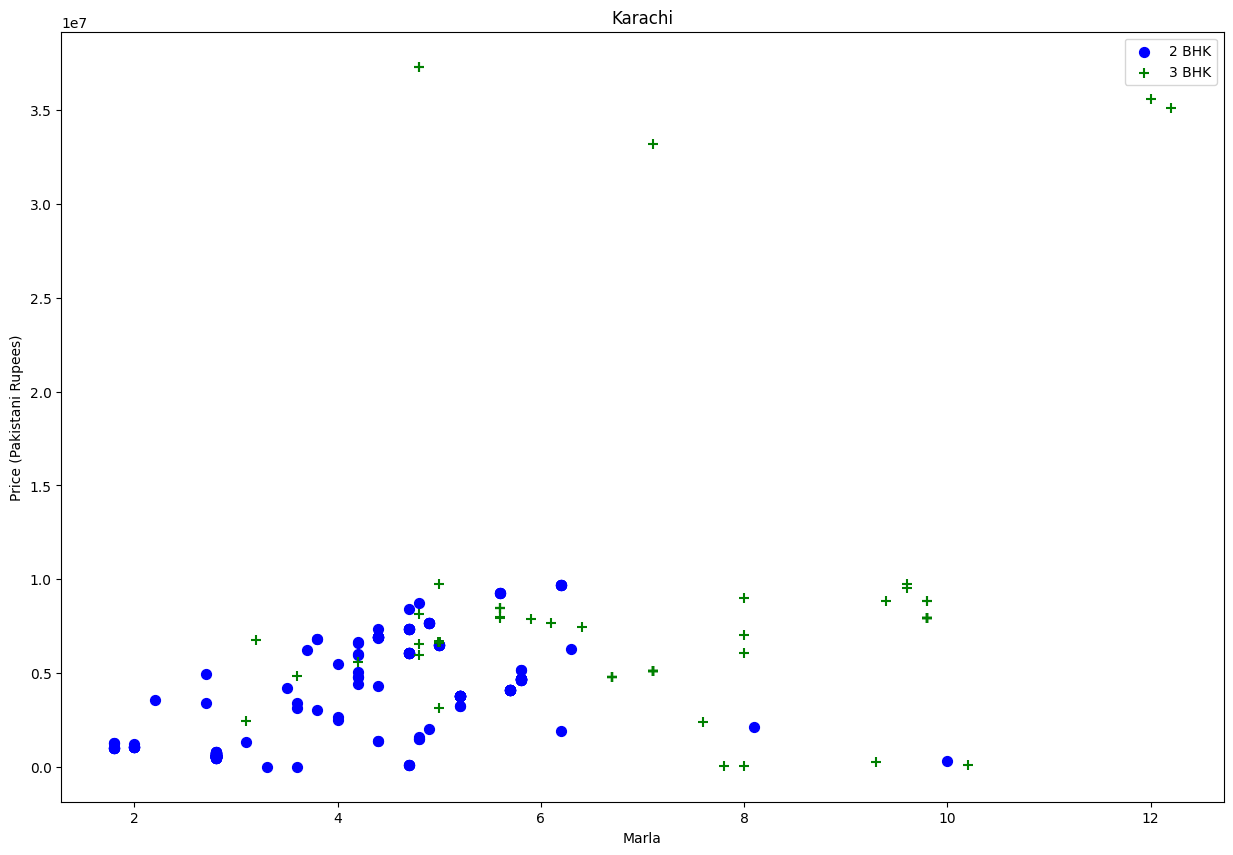

In [422]:
plot_scatter_chart(df4, 'Karachi')



In [423]:
dummies = pd.get_dummies(df4.city).astype(int)
dummies1 =pd.get_dummies(df4['Area Type']).astype(int)
dummies.head()


,Faisalabad,Islamabad,Karachi,Lahore,Rawalpindi
227,0,1,0,0,0
364,0,0,1,0,0
402,0,1,0,0,0
514,0,0,1,0,0
540,0,0,1,0,0


In [424]:
dummies1.head()

,Kanal,Marla
227,0,1
364,0,1
402,0,1
514,0,1
540,0,1


In [425]:
df5 = pd.concat([df4, dummies.drop('Rawalpindi', axis='columns')], axis='columns')
df5.head()

,property_type,price,city,baths,bedrooms,Area Type,Area Size,Faisalabad,Islamabad,Karachi,Lahore
227,Flat,3965000,Islamabad,2,2,Marla,4.2,0,1,0,0
364,Flat,3760000,Karachi,2,2,Marla,5.2,0,0,1,0
402,Flat,5656000,Islamabad,2,2,Marla,3.6,0,1,0,0
514,Flat,35100000,Karachi,3,3,Marla,12.2,0,0,1,0
540,Flat,4666000,Karachi,2,2,Marla,5.8,0,0,1,0


In [426]:
df5 = pd.concat([df5, dummies1.drop('Kanal', axis='columns')], axis='columns')
df5.head()

,property_type,price,city,baths,bedrooms,Area Type,Area Size,Faisalabad,Islamabad,Karachi,Lahore,Marla
227,Flat,3965000,Islamabad,2,2,Marla,4.2,0,1,0,0,1
364,Flat,3760000,Karachi,2,2,Marla,5.2,0,0,1,0,1
402,Flat,5656000,Islamabad,2,2,Marla,3.6,0,1,0,0,1
514,Flat,35100000,Karachi,3,3,Marla,12.2,0,0,1,0,1
540,Flat,4666000,Karachi,2,2,Marla,5.8,0,0,1,0,1


In [427]:
dummies2 = pd.get_dummies(df5['property_type']).astype(int)
df6 = pd.concat([df5, dummies2.drop('House', axis='columns')], axis='columns')

In [428]:
df6.drop(['property_type','Area Type','city'], axis='columns', inplace=True)


In [429]:
df6.head()

,price,baths,bedrooms,Area Size,Faisalabad,Islamabad,Karachi,Lahore,Marla,Farm House,Flat,Lower Portion,Penthouse,Room,Upper Portion
227,3965000,2,2,4.2,0,1,0,0,1,0,1,0,0,0,0
364,3760000,2,2,5.2,0,0,1,0,1,0,1,0,0,0,0
402,5656000,2,2,3.6,0,1,0,0,1,0,1,0,0,0,0
514,35100000,3,3,12.2,0,0,1,0,1,0,1,0,0,0,0
540,4666000,2,2,5.8,0,0,1,0,1,0,1,0,0,0,0


In [430]:
X = df6.drop('price', axis='columns')


In [431]:
X.head()

,baths,bedrooms,Area Size,Faisalabad,Islamabad,Karachi,Lahore,Marla,Farm House,Flat,Lower Portion,Penthouse,Room,Upper Portion
227,2,2,4.2,0,1,0,0,1,0,1,0,0,0,0
364,2,2,5.2,0,0,1,0,1,0,1,0,0,0,0
402,2,2,3.6,0,1,0,0,1,0,1,0,0,0,0
514,3,3,12.2,0,0,1,0,1,0,1,0,0,0,0
540,2,2,5.8,0,0,1,0,1,0,1,0,0,0,0


In [432]:
y = df6.price

In [433]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [475]:
from sklearn.tree import DecisionTreeRegressor
lr_clf = DecisionTreeRegressor()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)


array([6.63166667e+06, 2.30270833e+05, 8.65200000e+06, 8.26000000e+04,
       3.53600000e+06, 3.35000000e+05, 5.29211268e+05, 4.03487805e+07,
       7.04400000e+06, 2.33038462e+04, 4.03487805e+07, 2.44500000e+04,
       9.22500000e+06, 5.34900000e+06, 3.16066667e+06, 9.66675000e+06,
       9.60000000e+04, 4.09000000e+06, 4.03487805e+07, 7.62600000e+06,
       5.97500000e+06, 4.03487805e+07, 5.29211268e+05, 5.57392857e+06,
       4.30000000e+04, 6.03000000e+05, 2.07638298e+07, 2.44500000e+04,
       2.28384615e+07, 8.93826923e+05, 4.03487805e+07, 2.30270833e+05,
       9.14500000e+06, 8.82600000e+06, 2.07638298e+07, 1.90400000e+06,
       3.28000000e+07, 7.41666667e+04, 7.70300000e+06, 5.15000000e+04,
       7.70300000e+06, 2.49040000e+07, 2.44500000e+04, 8.93826923e+05,
       8.93826923e+05, 9.99000000e+05, 2.33038462e+04, 4.43666667e+06,
       2.07638298e+07, 6.65153846e+06, 3.32500000e+06, 5.72066667e+06,
       4.78700000e+06, 3.32500000e+06, 2.70866667e+07, 8.93826923e+05,
      

In [435]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.54972299, 0.5927685 , 0.54387577, 0.57192317, 0.60561697])

In [436]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


find_best_model_using_gridsearchcv(X,y)


c:\Users\wajiz.pk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wajiz.pk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wajiz.pk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\wajiz.pk\AppData\Local\Programs\Python\Python312\Lib\site-packages\skl

,model,best_score,best_params
0,linear_regression,0.572781,"{'fit_intercept': True, 'positive': False}"
1,lasso,0.572782,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.720741,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [437]:
X.columns

Index(['baths', 'bedrooms', 'Area Size', 'Faisalabad', 'Islamabad', 'Karachi',
       'Lahore', 'Marla', 'Farm House', 'Flat', 'Lower Portion', 'Penthouse',
       'Room', 'Upper Portion'],
      dtype='object')

In [479]:
def predict_price(location, baths, bedrooms, area_size, marla, farm_house, flat, lower_portion, penthouse, room, upper_portion):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = baths
    x[1] = bedrooms
    x[2] = area_size
    x[3] = marla
    x[4] = farm_house
    x[5] = flat
    x[6] = lower_portion
    x[7] = penthouse
    x[8] = room
    x[9] = upper_portion

    if loc_index >= 0:
        x[loc_index] = 1
    print(loc_index)
    return lr_clf.predict([x])[0]



In [487]:
predict_price('Islamabad', 2 , 2 , 4.2, 0, 0, 0, 0, 0, 0, 0)

4


c:\Users\wajiz.pk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


5083000.0